In [11]:
import numpy as np
import tensorflow
from tensorflow import keras 
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras import Input,Model
from keras.layers import Dense,GlobalAveragePooling2D,Conv2D,Flatten
from keras.optimizers import Adam
from keras.utils import plot_model
from keras.metrics import CategoricalAccuracy

In [41]:
data_train = ImageDataGenerator(rescale=1./255,
                                brightness_range = [0.4 , 1.5],
                                rotation_range = 10,
                                zoom_range = 0.1,
                                width_shift_range = 0.1,
                                height_shift_range = 0.1,
                                horizontal_flip = True,
                                vertical_flip = True,  
                                validation_split=0.2
                               )

data_val = ImageDataGenerator()

data_test = ImageDataGenerator()

In [42]:
train_set = data_train.flow_from_directory('train/apples/',
                                          target_size=(224,224),
                                          color_mode='rgb',
                                          class_mode='categorical',
                                          subset='training'
#                                            batch_size=32
#                                            save_to_dir='.',
#                                            save_format='png',
#                                            save_prefix='aug'
                                          )

val_set = data_train.flow_from_directory('train/apples/',
                                          target_size=(224,224),
                                          color_mode='rgb',
                                          class_mode='categorical',
                                          subset='validation'
#                                            batch_size=32
                                          )

test_set = data_train.flow_from_directory('test/apples/',
                                          target_size=(224,224),
                                          color_mode='rgb',
                                          class_mode='categorical'
#                                            batch_size=32
                                         )

Found 316 images belonging to 2 classes.
Found 79 images belonging to 2 classes.
Found 28 images belonging to 2 classes.


In [43]:
print('Traning classes and their inices: {}'.format(train_set.class_indices))
print('Traning classes and their inices: {}'.format(train_set.samples))


Traning classes and their inices: {'freshapples': 0, 'rottenapples': 1}
Traning classes and their inices: 316


In [44]:
def showDataDistribution() -> None: 
    plt.bar(['Training Samples','Validation Samples'],
            [train_set.samples,val_set.samples],
            align='center',
            color=['green','red'])
    
    plt.ylabel('number of images')
    plt.title('Data Distrubution')
    
    for index in range(2):
        x = ['Training Samples','Validation Samples']
        y=  [train_set.samples,val_set.samples]
        plt.text(x=x[index],
                 y=y[index],
                 s=str(y[index]),
                 ha='center',
                 bbox=dict(facecolor='yellow',alpha=0.8))

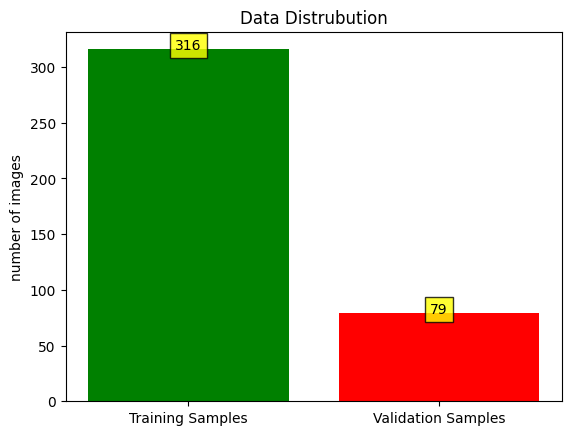

In [45]:
showDataDistribution()

In [46]:
base_model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224,224,3))

In [47]:
base_model.trainable = False

In [48]:
input_layer = Input(shape=(224,224,3))

In [52]:
output_base_model = base_model(input_layer,training=False)
global_pooling = GlobalAveragePooling2D()(input_layer)
# flatten = Flatten()(input_layer)
dense_one = Dense(64,activation='relu')(global_pooling)
dense_two = Dense(32,activation='relu')(dense_one)
dense_three = Dense(16,activation='relu')(dense_two)
output_layer = Dense(1,activation='softmax')(dense_three)

model = Model(input_layer,output_layer)
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
               metrics=CategoricalAccuracy(name='accuracy')
              )

In [53]:
# plot_model(model,
#           show_shapes=True,
#           show_layer_names=True,
#           show_layer_activations=True,
# #           to_file = '.',
#           dpi = 300)

In [54]:
model.fit(train_set,
          validation_data=val_set,
          epochs=10,
#           steps_per_epoch=train_set.samples/train_set.batch_size,
#           validation_steps=val_set.samples/val_set.batch_size,
         )

Epoch 1/10
10/10 [==============================] - 20s 2s/step - loss: 0.6932 - accuracy: 0.4810 - val_loss: 0.6932 - val_accuracy: 0.4810
Epoch 2/10
10/10 [==============================] - 17s 2s/step - loss: 0.6932 - accuracy: 0.4810 - val_loss: 0.6931 - val_accuracy: 0.4810
Epoch 3/10
10/10 [==============================] - 16s 2s/step - loss: 0.6932 - accuracy: 0.4810 - val_loss: 0.6932 - val_accuracy: 0.4810
Epoch 4/10
10/10 [==============================] - 17s 2s/step - loss: 0.6931 - accuracy: 0.4810 - val_loss: 0.6931 - val_accuracy: 0.4810
Epoch 5/10
 4/10 [===========>..................] - ETA: 7s - loss: 0.6931 - accuracy: 0.4453

KeyboardInterrupt: 

In [55]:
from tensorflow import keras

base_model = keras.applications.VGG16(
    weights='imagenet',
    input_shape=(224, 224, 3),
    include_top=False)

In [56]:
base_model.trainable = False


In [65]:
# Create inputs with correct shape
inputs = base_model.input

x = base_model(inputs, training=False)

# Add pooling layer or flatten layer
x = keras.layers.Flatten()(base_model.output)

# Add final dense layer
outputs = keras.layers.Dense(1, activation = 'sigmoid')(x)

# Combine inputs and outputs to create model
model = keras.Model(inputs=inputs, outputs=outputs)

In [66]:
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [67]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'], optimizer='rmsprop')

Epoch 1/10
8/9 [=======================>......] - ETA: 16s - loss: 1.9065 - accuracy: 0.5000

KeyboardInterrupt: 